[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Object Detection from Videos with YOLOv5

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/visual-layer/fastdup/blob/main/examples/video-yolov5-detection.ipynb)

In this tutorial, we will use fastdup with a pretrained yolov5 object detection model to detect and crop from videos. Following that we analyze the cropped objects for issues such as duplicates, near-duplicates, outliers, bright/dark/blurry objects.

## Installation & Setting Up

In [1]:
!pip install fastdup gdown -Uq

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.25'

## Download & Extract Dataset

In [3]:
!gdown  --fuzzy https://drive.google.com/file/d/1fzmOgmRu557aU4lEbzL7XCf78KntFCeQ/view

Downloading...
From (uriginal): https://drive.google.com/uc?id=1fzmOgmRu557aU4lEbzL7XCf78KntFCeQ
From (redirected): https://drive.google.com/uc?id=1fzmOgmRu557aU4lEbzL7XCf78KntFCeQ&confirm=t&uuid=3d1e9ae0-b405-404f-a0ed-9174b2401633
To: /media/dnth/Active-Projects/fastdup/examples/data.zip
100%|██████████████████████████████████████| 56.9M/56.9M [00:05<00:00, 10.5MB/s]


In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/video_14.mp4       
  inflating: data/video_13.mp4       
  inflating: data/video_12.mp4       
  inflating: data/video_9.mp4        
  inflating: data/video_15.mp4       
  inflating: data/video_10.mp4       
  inflating: data/video_11.mp4       
  inflating: data/video_8.mp4        
  inflating: data/video_1.mp4        
  inflating: data/video_2.mp4        
  inflating: data/video_3.mp4        
  inflating: data/video_4.mp4        
  inflating: data/video_5.mp4        
  inflating: data/video_6.mp4        
  inflating: data/video_7.mp4        


## Video to Images

fastdup works on images. We must first turn the videos into frames of images.

We can use a one-liner fastdup utility function to turn all the videos in a folder into frames:

In [5]:
fastdup.extract_video_frames(input_dir="data", work_dir="frames")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-12 16:11:02 [INFO] Going to loop over dir data
2023-07-12 16:11:02 [INFO] Found total 15 videos to run on, 15 train, 0 test, name list 15, counter 15 


0

## Run fastdup

Now that we have the frames of images, let's run fastdup and analyze the frames.

In [6]:
fd = fastdup.create(input_dir='frames', work_dir='yolov5_detection_work_dir')

In [7]:
fd.run(bounding_box='yolov5s')

Trying to download yolov5s model from https://github.com/itsnine/yolov5-onnxruntime/raw/master/models/yolov5s.onnx
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-12 16:11:11 [INFO] Going to loop over dir frames
2023-07-12 16:11:11 [INFO] Found total 99 images to run on, 99 train, 0 test, name list 99, counter 99 
FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.utes
2023-07-12 16:11:22 [INFO] Going to loop over dir /tmp/crops_input.csv
2023-07-12 16:11:22 [INFO] Found total 130 images to run on, 130 train, 0 test, name list 130, counter 130 
2023-07-12 16:11:23 [INFO] Found total 130 images to run onstimated: 0 Minutes
Finished histogram 0.156
Finished bucket sort 0.168
2023-07-12 16:11:23 [INFO] 10) Finished write_index() NN model
2023-07-12 16:11:23 [INFO] Stored nn model index file yolov5_detection_work_dir/nnf.index
2023-07-12 16:11:23 [INFO] Total time took 1016 ms
2023-07-12 16:11:23 [INFO] Found a total of 0 fully iden

0

## Components Gallery

We can visualize the cluster of similar detections using the components gallery view. Specify `draw_bbox=True` to see the detection bounding box on the original image.

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 37.14it/s]


Finished OK. Components are stored as image files yolov5_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  yolov5_detection_work_dir/galleries/components.html
Execution time in seconds 0.1



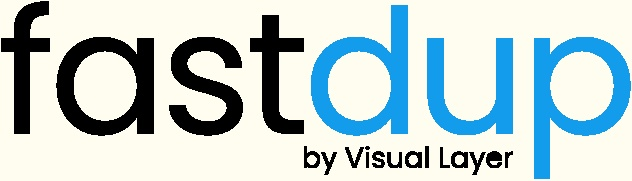
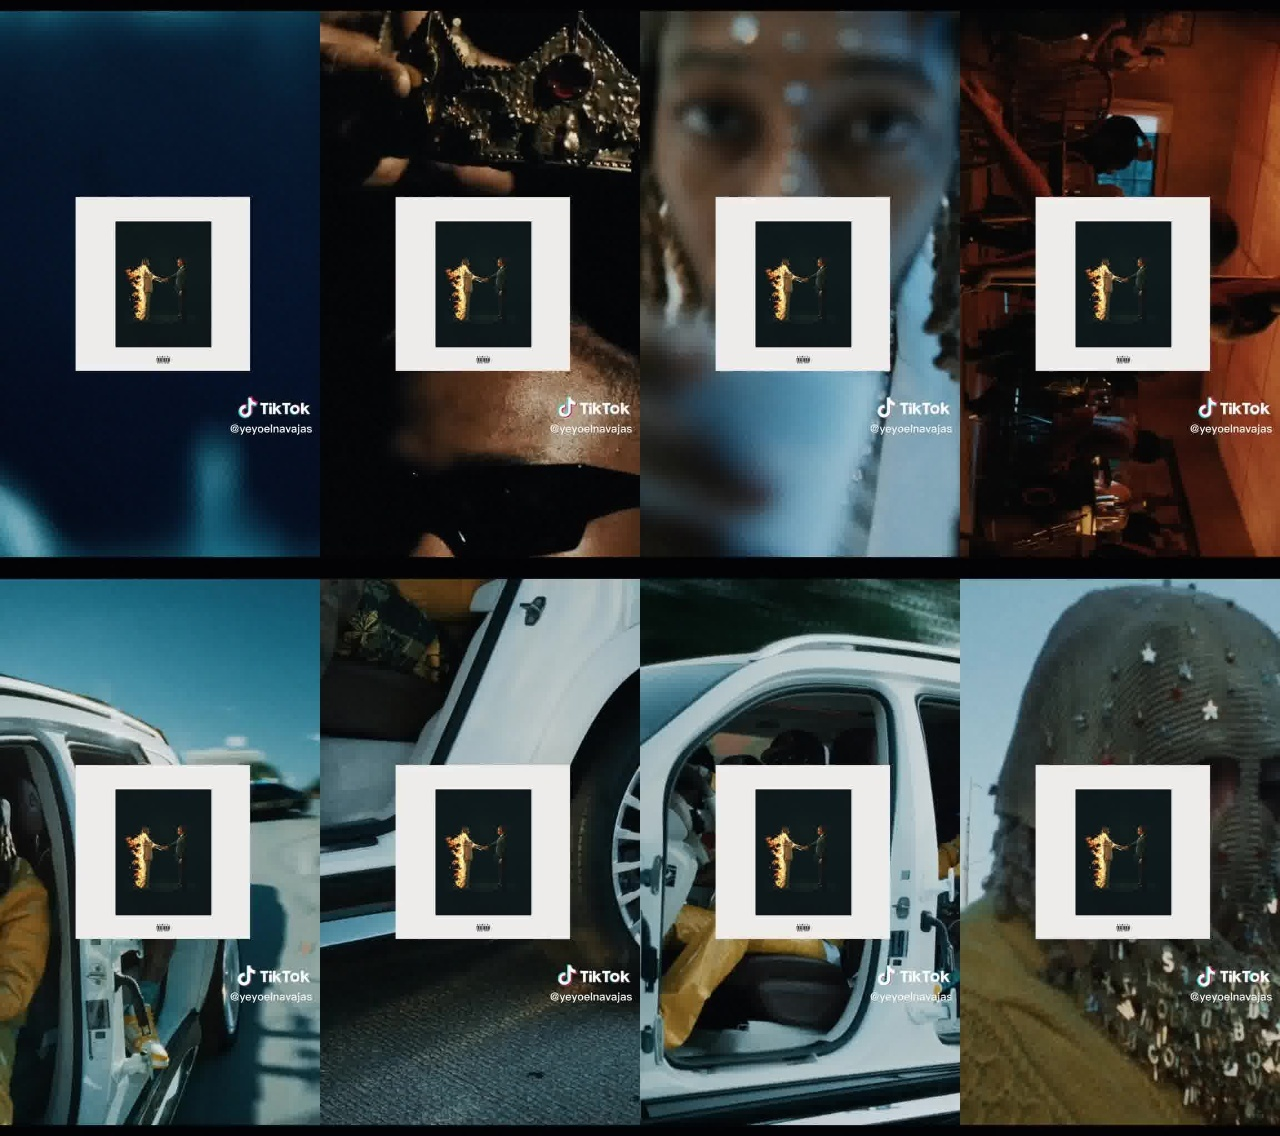
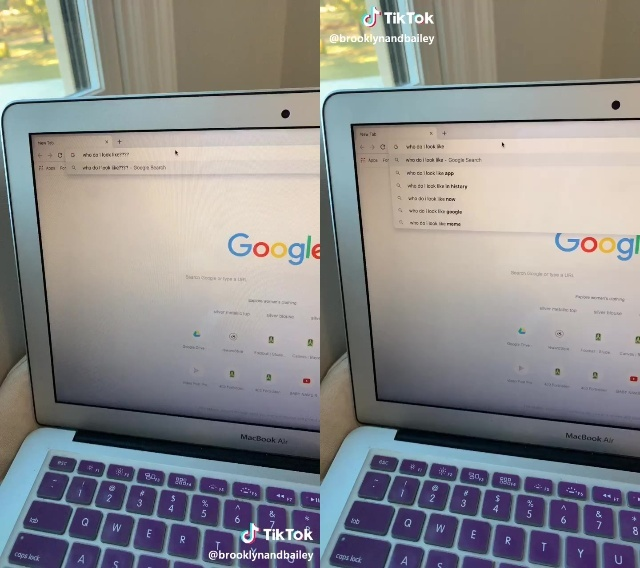
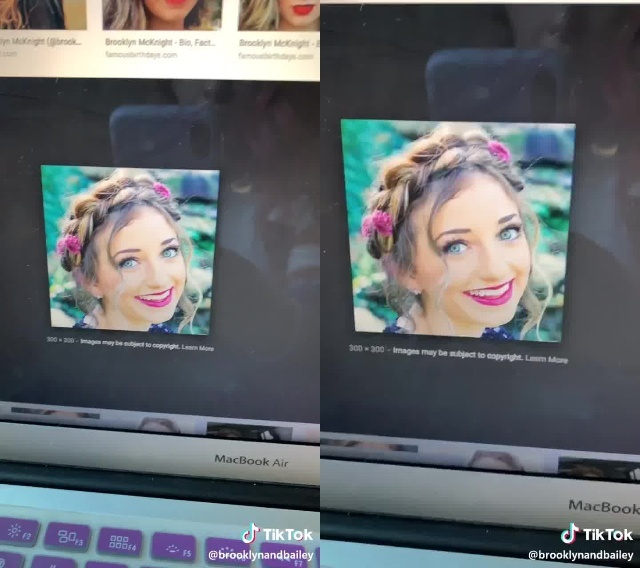

0

In [8]:
fd.vis.component_gallery(draw_bbox=True)

If you'd like to view just the cropped bounding box images, specify `draw_bbox=False`

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 98.38it/s]

Finished OK. Components are stored as image files yolov5_detection_work_dir/galleries/components_[index].jpg
Stored components visual view in  yolov5_detection_work_dir/galleries/components.html
Execution time in seconds 0.1



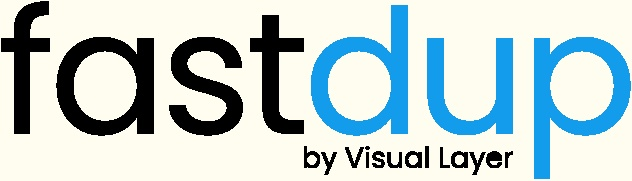
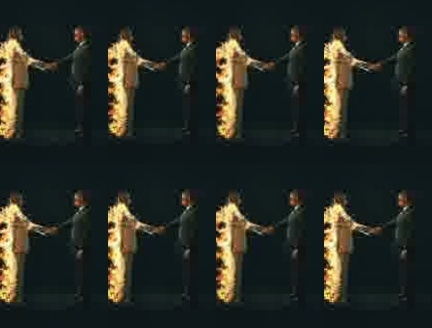
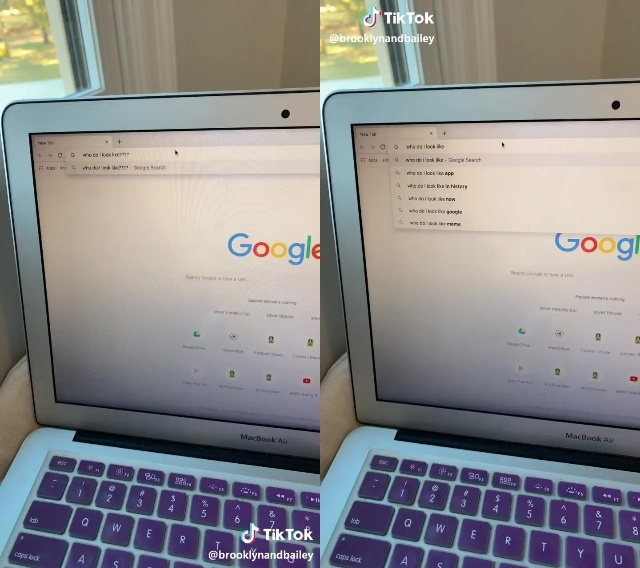
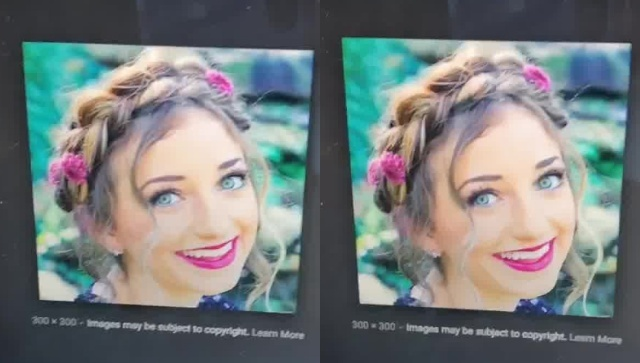

0

In [9]:
fd.vis.component_gallery(draw_bbox=False)

## Find Similar Objects Across Videos

Using the `similarity_gallery` view, we can find similar looking detections across all the extracted frames.

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 63.14it/s]


Stored similar images visual view in  yolov5_detection_work_dir/galleries/similarity.html



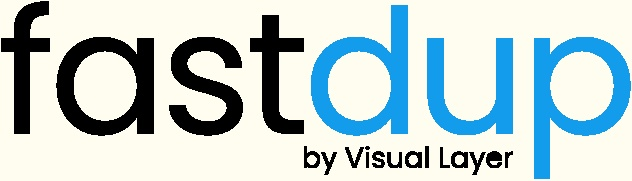
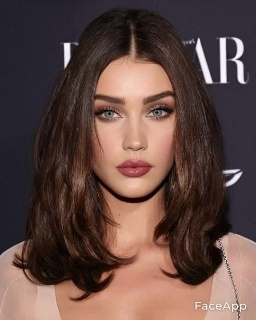
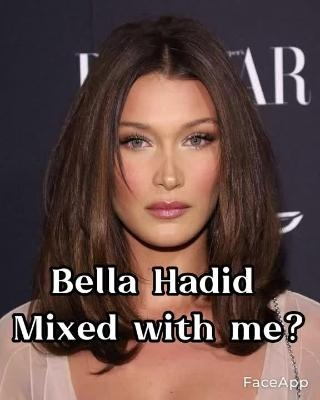
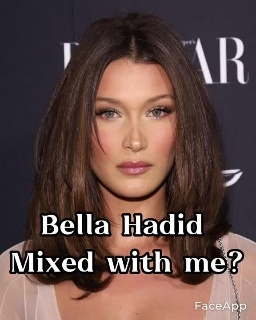
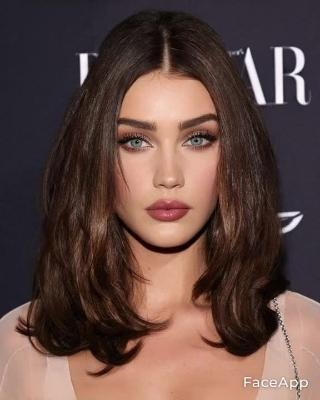
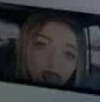
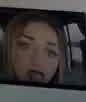
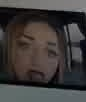
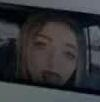
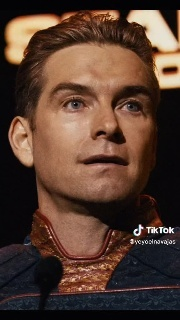
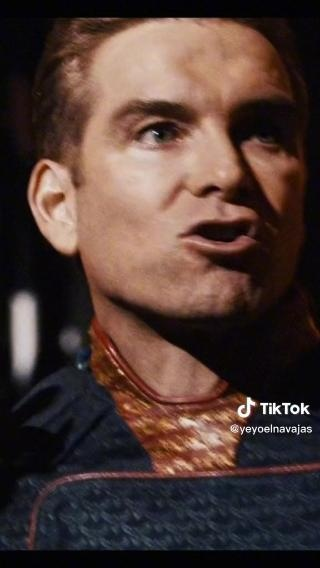
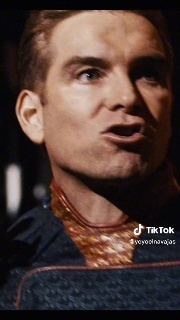
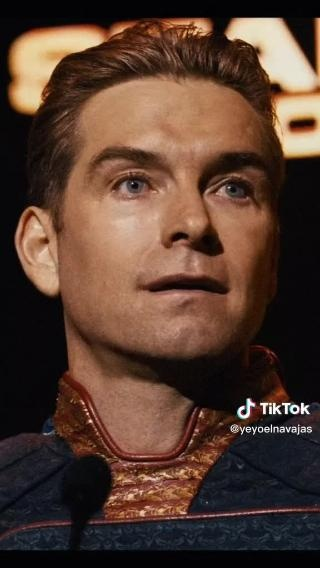
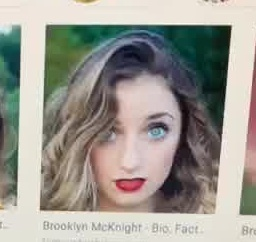
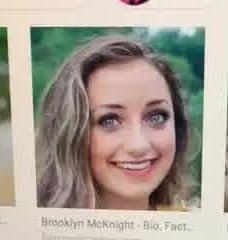
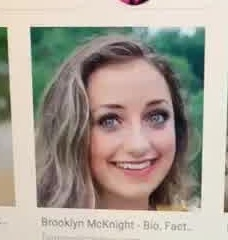
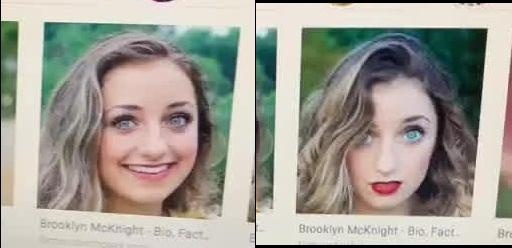
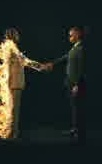
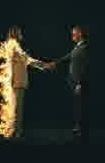
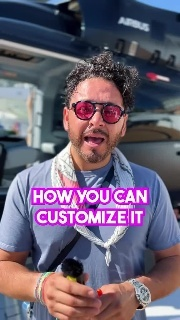
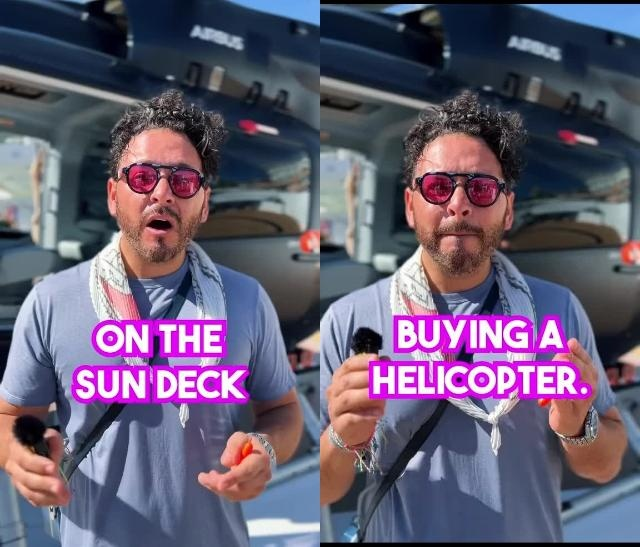
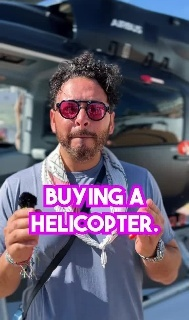
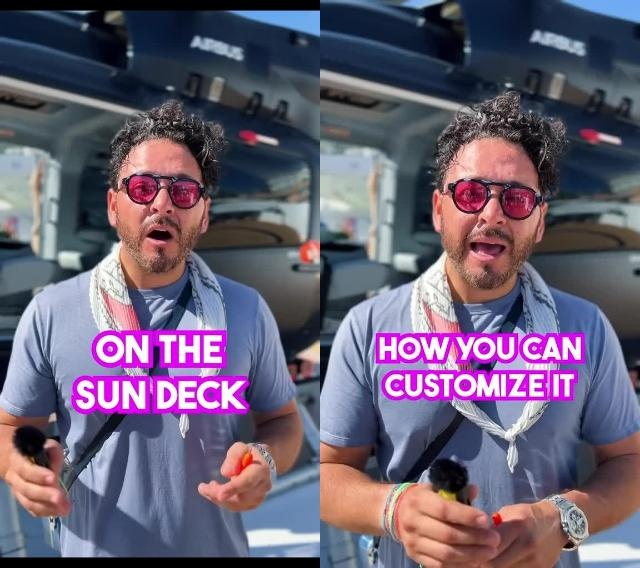
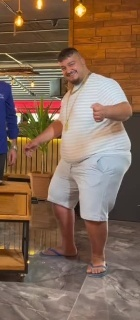
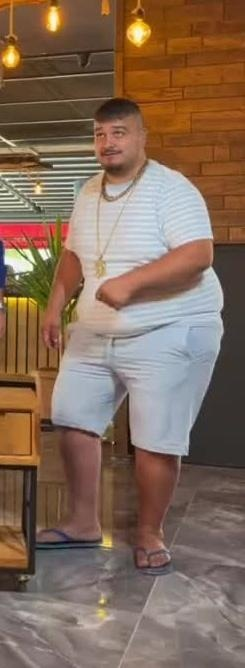
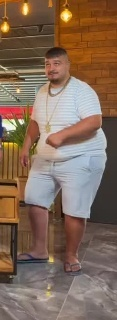
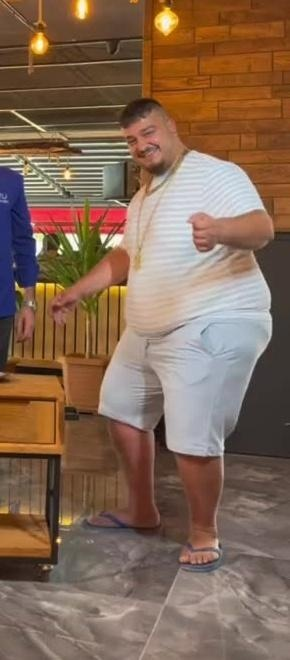
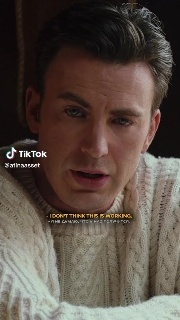
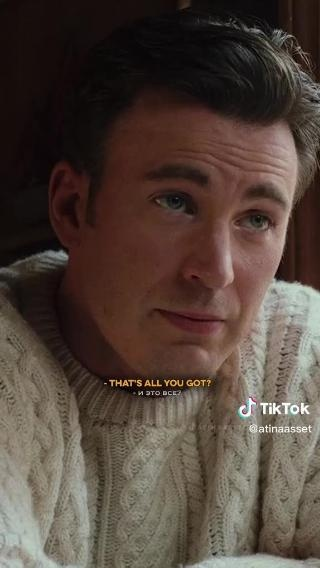
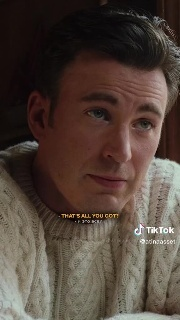
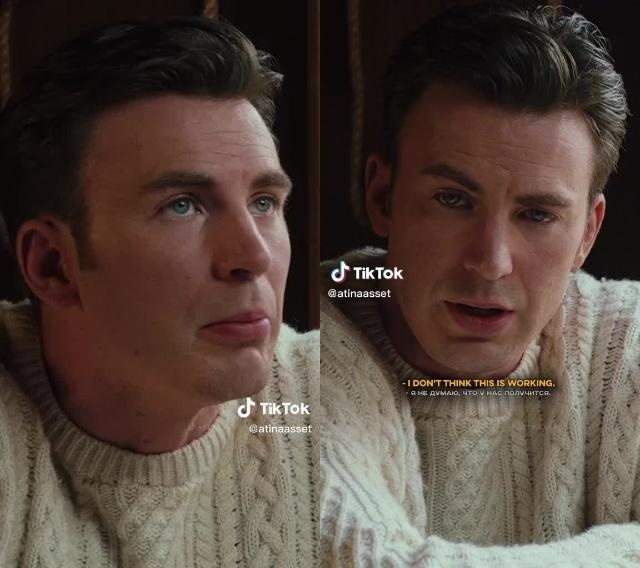
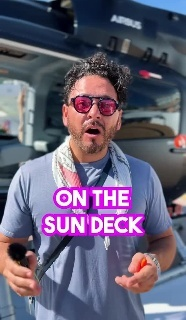
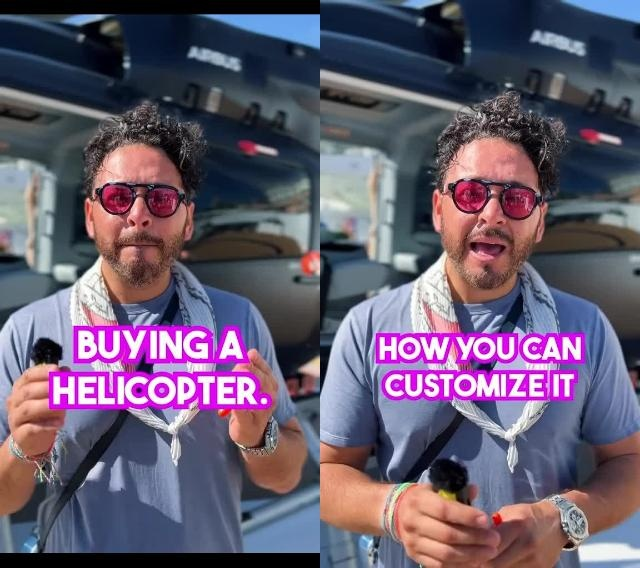
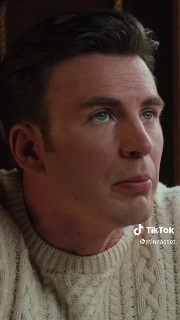
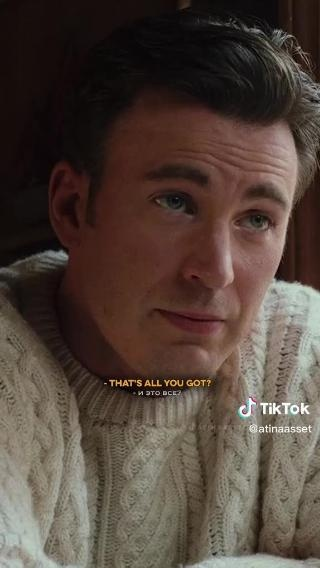
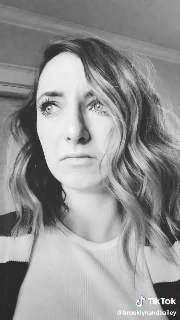
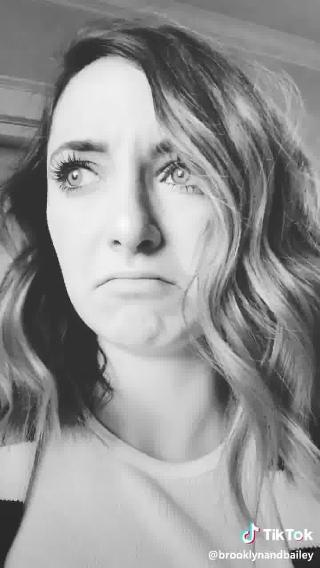
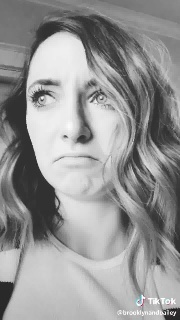
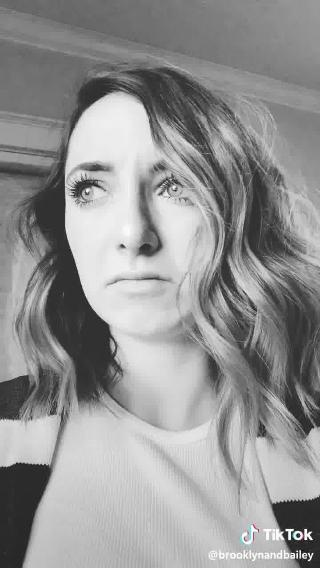
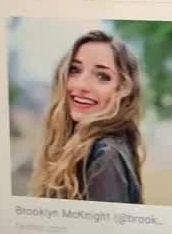
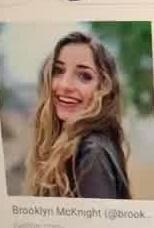

from                                                                                                                                                                                            to              distance
27   yolov5_detection_work_dir/crops/framestmpdatavideo_11.mp4output_000002.jpg_15_11_529_692.jpg                                                                                                [yolov5_detection_work_dir/crops/framestmpdatavideo_11.mp4output_000001.jpg_39_25_515_703.jpg]            [0.901143]
26   yolov5_detection_work_dir/crops/framestmpdatavideo_11.mp4output_000001.jpg_39_25_515_703.jpg                                                                                                [yolov5_detection_work_dir/crops/framestmpdatavideo_11.mp4output_000002.jpg_15_11_529_692.jpg]            [0.901143]
2     yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000006.jpg_136_832_72_74.jpg                                                                                                   [yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000007.jpg_0_710_72_74.jpg]            [0.903201]
8       yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000007.jpg_0_710_72_74.jpg                                                                                                 [yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000006.jpg_136_832_72_74.jpg]            [0.903201]
35    yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000006.jpg_14_43_531_907.jpg                                                                                                [yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000003.jpg_35_14_530_1005.jpg]            [0.908426]
..                                                                                            ...                                                                                                                                                                                           ...                   ...
43   yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000018.jpg_261_462_78_117.jpg  [yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000020.jpg_261_461_77_118.jpg, yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000019.jpg_261_461_77_118.jpg]  [0.972028, 0.973552]
45   yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000020.jpg_261_461_77_118.jpg  [yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000018.jpg_261_462_78_117.jpg, yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000019.jpg_261_461_77_118.jpg]  [0.972028, 0.987846]
44   yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000019.jpg_261_461_77_118.jpg  [yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000018.jpg_261_462_78_117.jpg, yolov5_detection_work_dir/crops/framestmpdatavideo_3.mp4output_000020.jpg_261_461_77_118.jpg]  [0.973552, 0.987846]
18   yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000009.jpg_90_294_418_466.jpg                                                                                               [yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000008.jpg_124_386_316_366.jpg]            [0.987968]
16  yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000008.jpg_124_386_316_366.jpg                                                                                                [yolov5_detection_work_dir/crops/framestmpdatavideo_1.mp4output_000009.jpg_90_294_418_466.jpg]            [0.987968]

[50 rows x 3 columns]

In [10]:
fd.vis.similarity_gallery(draw_bbox=False)

## Find Outliers

Useing the `outliers_gallery` we can also visualize detections that looks visually different from others.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 31536.12it/s]

Stored outliers visual view in  yolov5_detection_work_dir/galleries/outliers.html



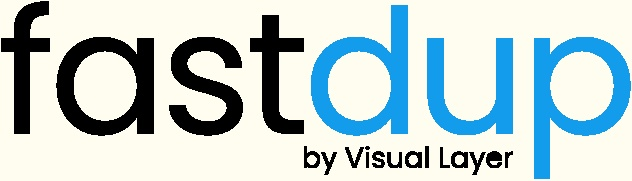
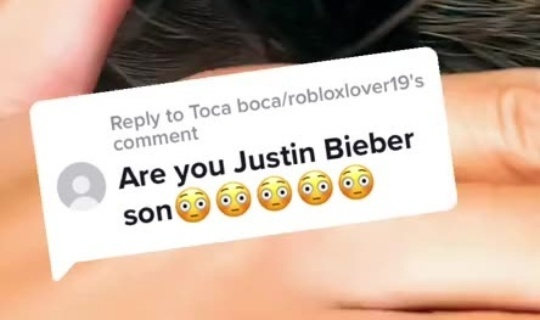
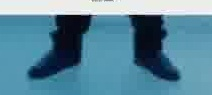
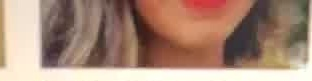
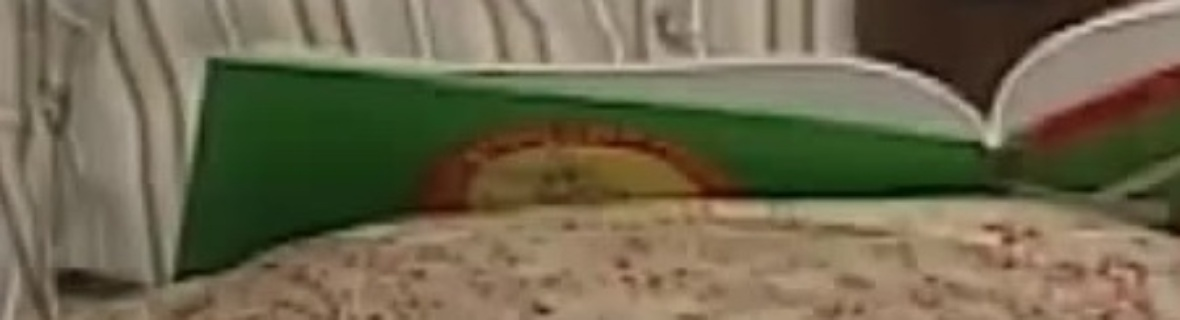
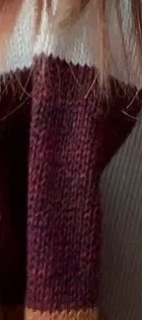
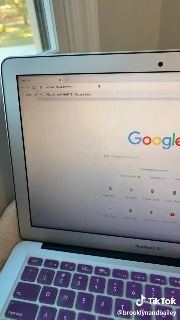
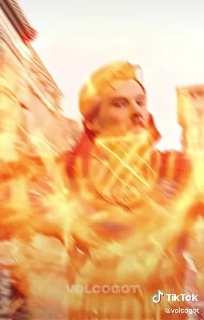
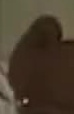
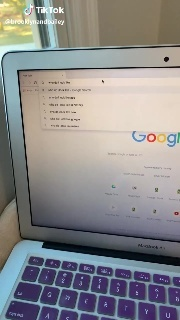
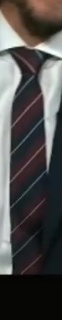
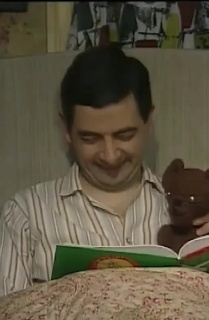

0

In [11]:
fd.vis.outliers_gallery()

## Duplicate Detections

With the `duplicates_gallery` view, visualize duplicate image pairs across videos.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 317.97it/s]


Stored similarity visual view in  yolov5_detection_work_dir/galleries/duplicates.html



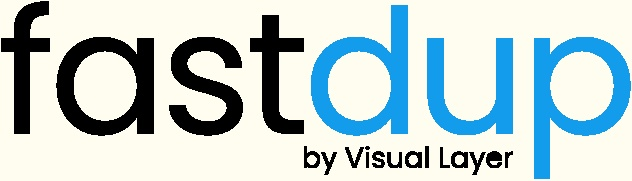
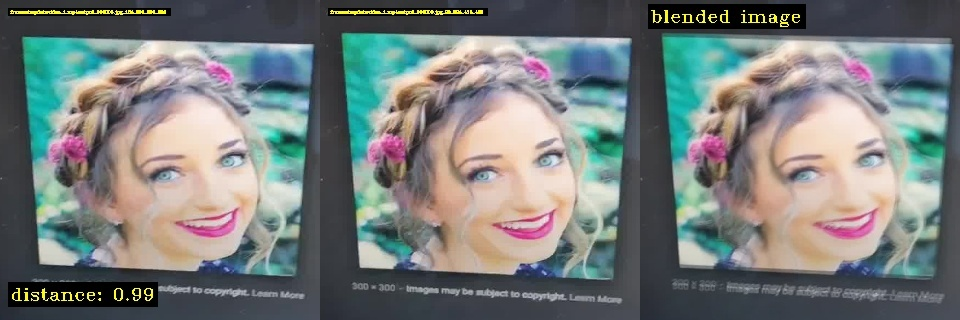
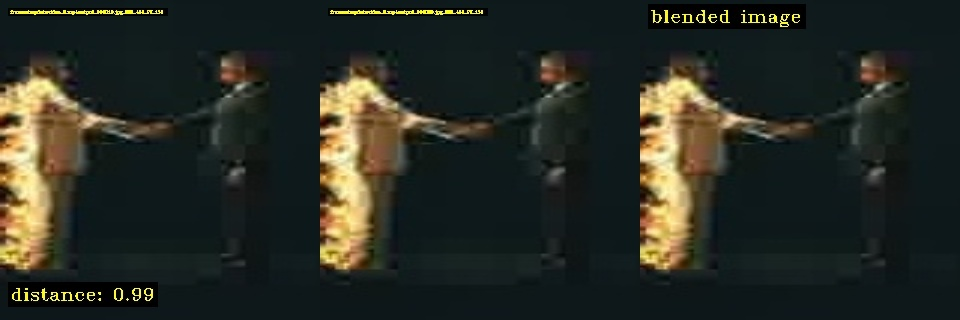
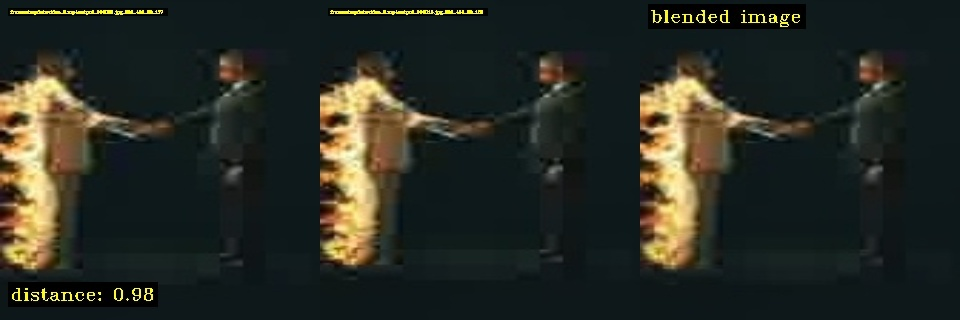
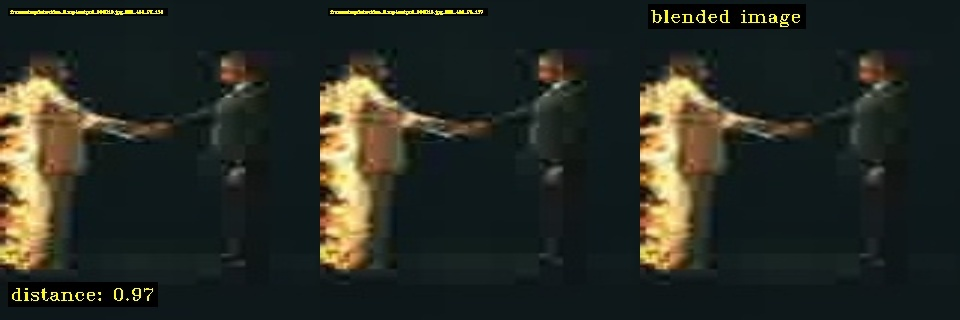
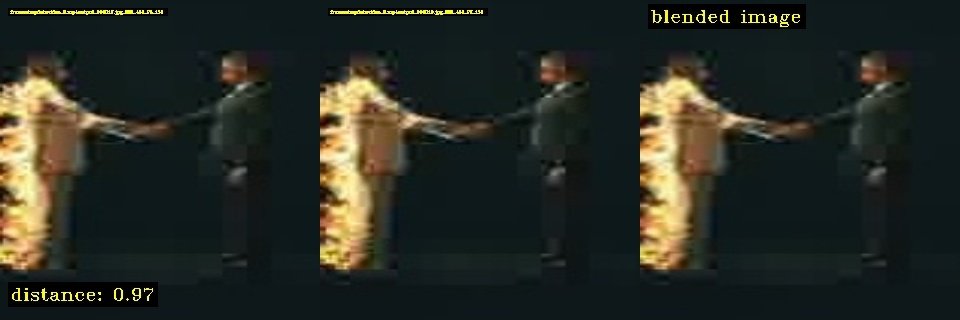
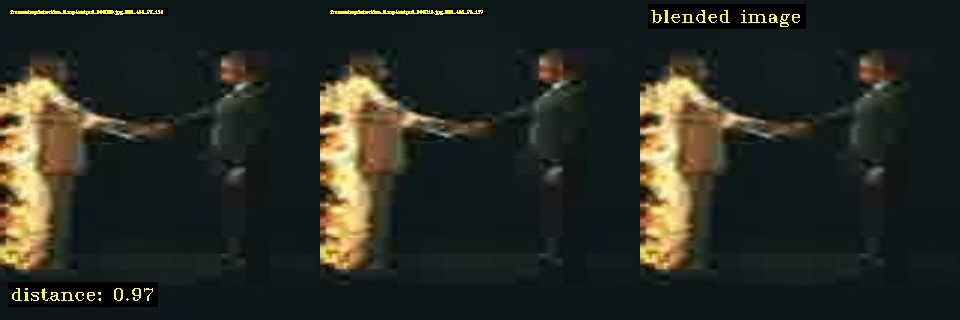
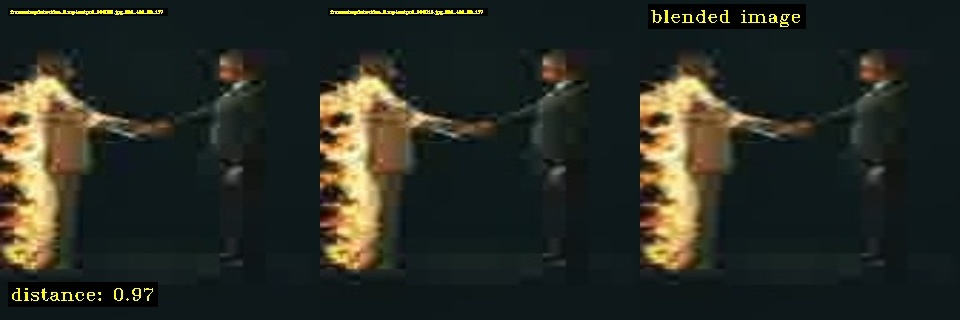
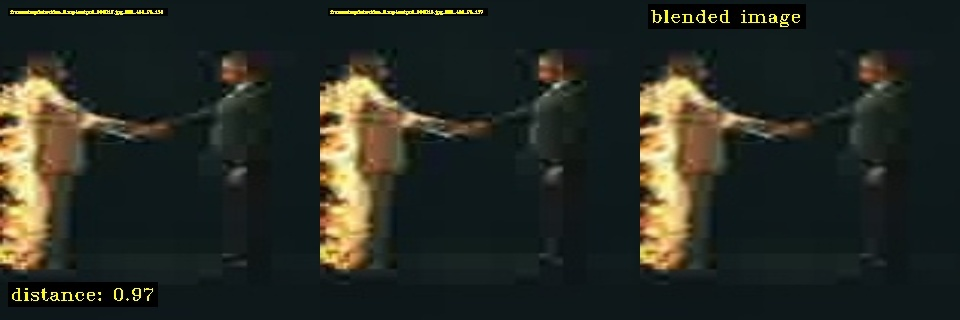
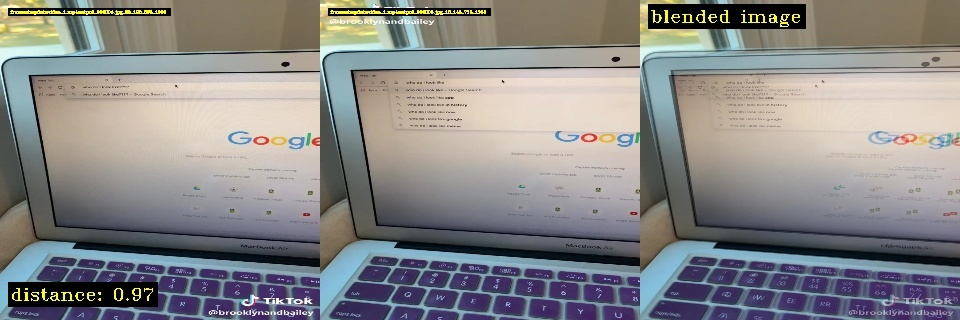
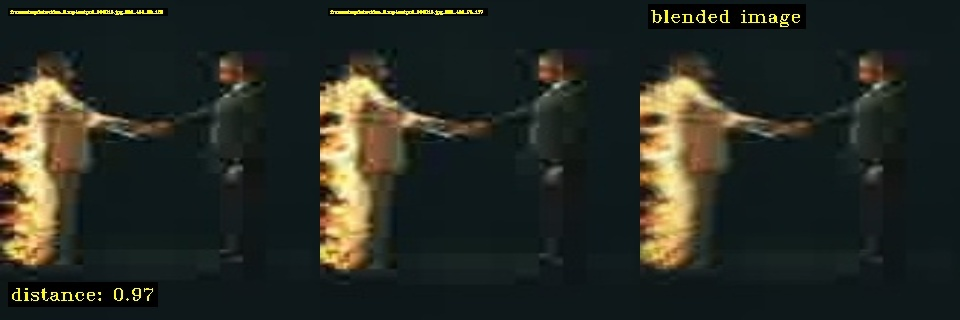
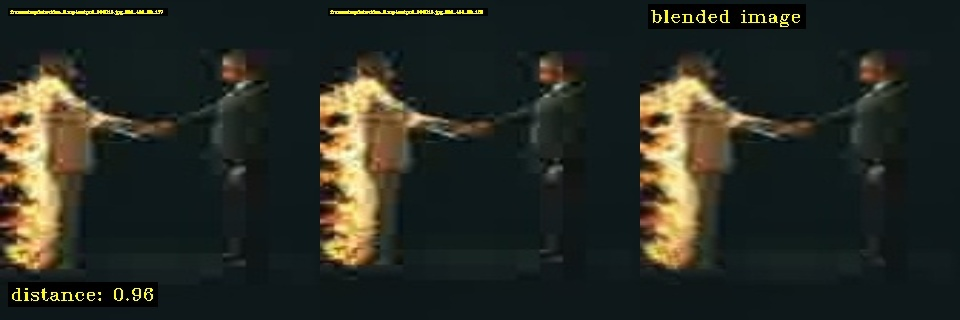
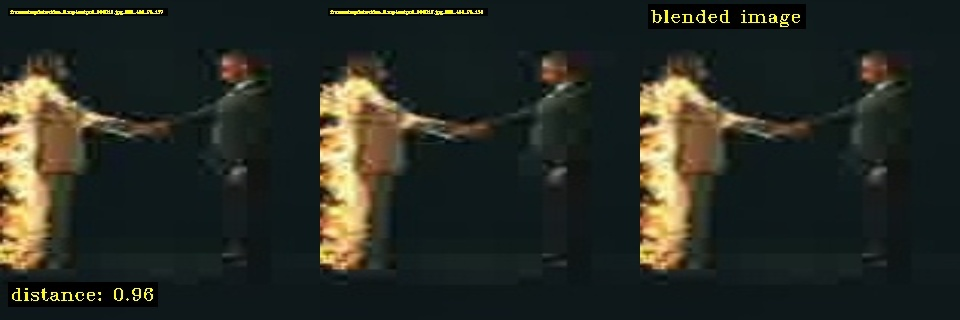
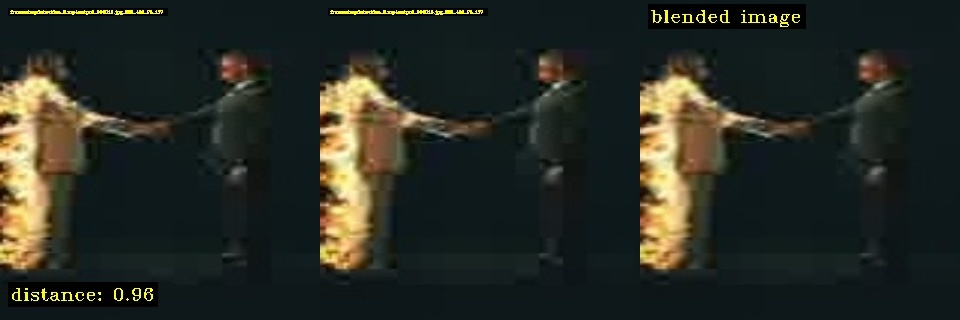

0

In [12]:
fd.vis.duplicates_gallery()

## Dark Detections

Using the `stats_gallery` view, we can sort the detections following a desired `metric` such as 'dark', 'bright' and 'blur'. 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 845.80it/s]

Stored mean visual view in  yolov5_detection_work_dir/galleries/mean.html



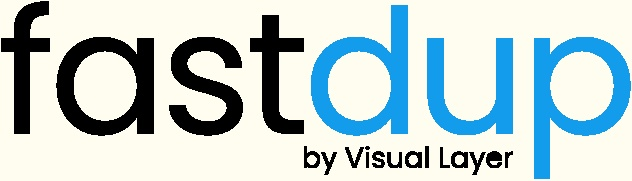
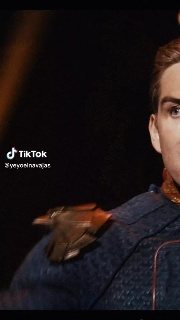
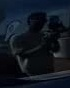
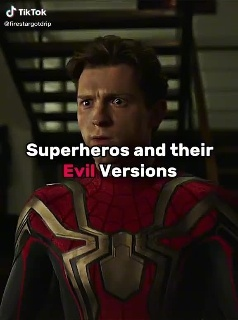
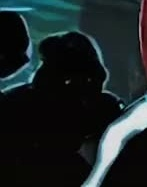
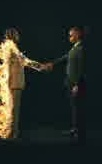
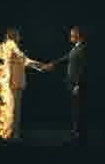
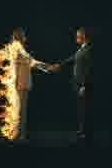
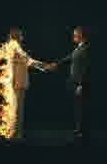
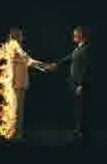
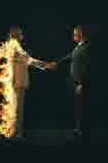
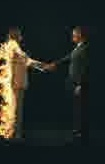
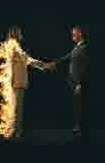
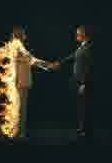
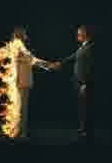
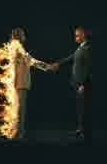
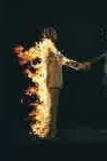
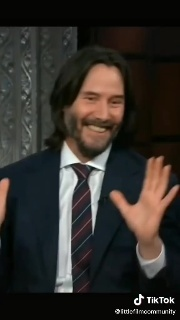
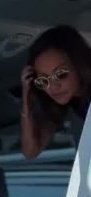
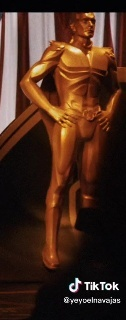
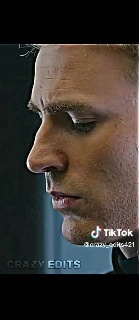

0

In [13]:
fd.vis.stats_gallery(metric='dark')

## Bright Detections

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 417.24it/s]


Stored mean visual view in  yolov5_detection_work_dir/galleries/mean.html



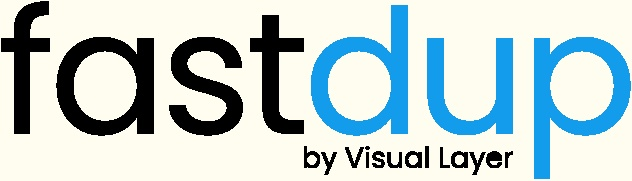
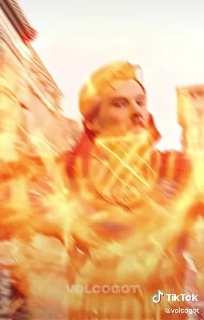
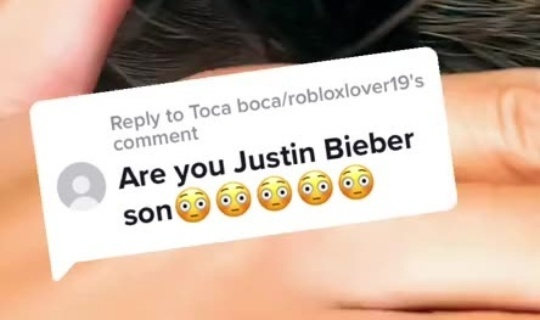
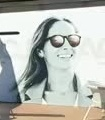
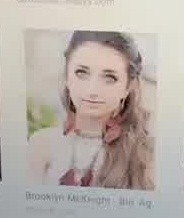
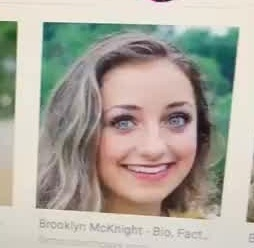
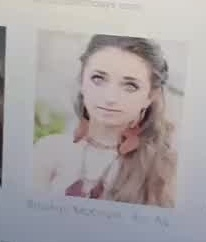
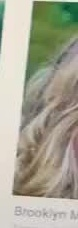
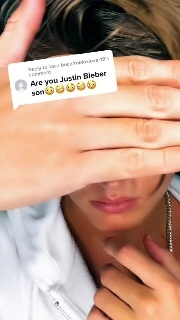
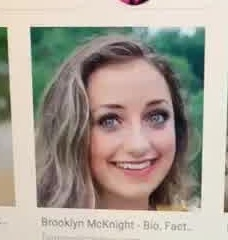
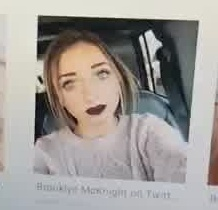
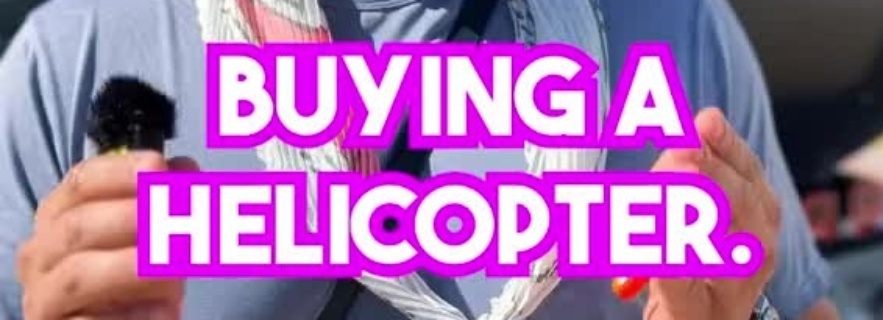
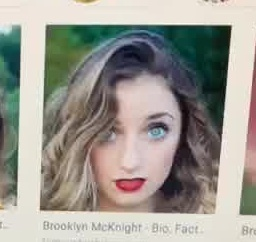
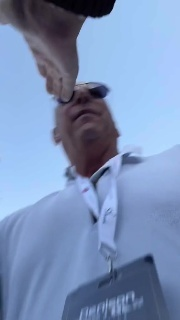
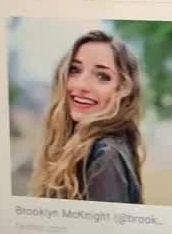
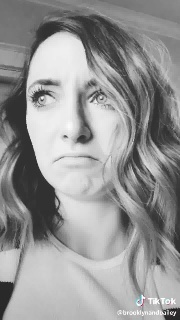
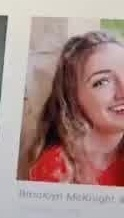
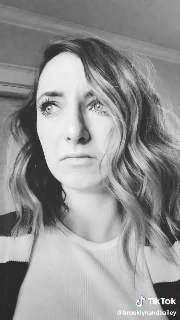
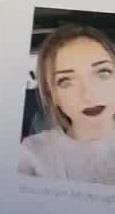
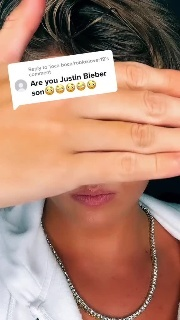
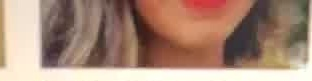

0

In [14]:
fd.vis.stats_gallery(metric='bright')

## Blurry Detections

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1060.43it/s]


Stored blur visual view in  yolov5_detection_work_dir/galleries/blur.html



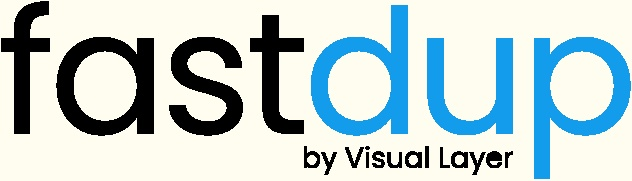
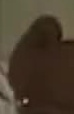
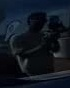
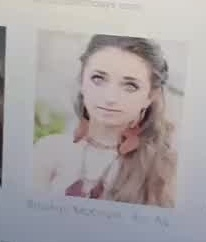
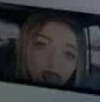
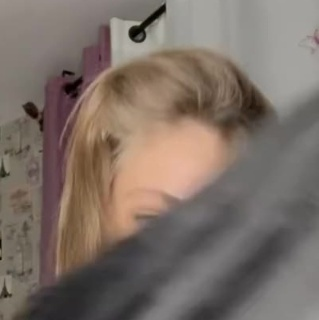
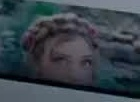
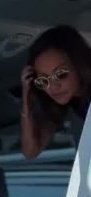
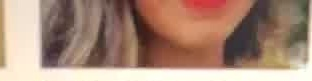
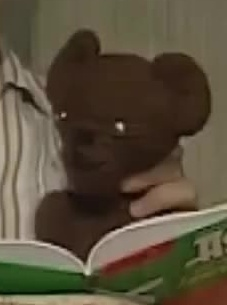
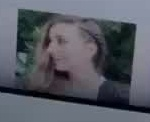
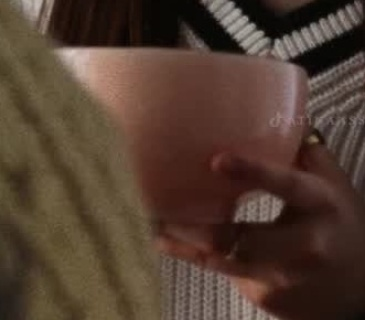
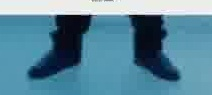
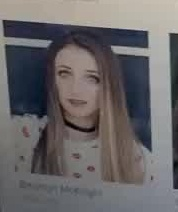
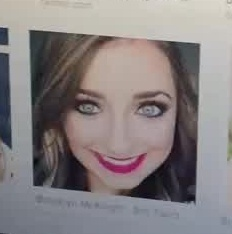
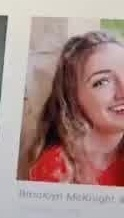
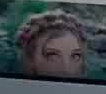
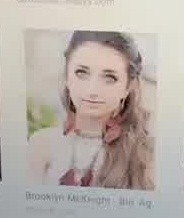
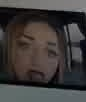
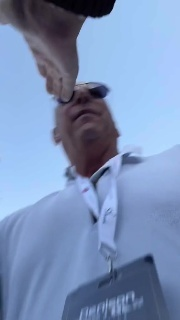
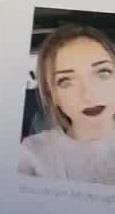

0

In [15]:
fd.vis.stats_gallery(metric='blur')

## Wrap Up

Next, feel free to check out other tutorials -

+ ⚡ [**Quickstart**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb): Learn how to install fastdup, load a dataset and analyze it for potential issues such as duplicates/near-duplicates, broken images, outliers, dark/bright/blurry images, and view visually similar image clusters. If you're new, start here!
+ 🧹 [**Clean Image Folder**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb): Learn how to analyze and clean a folder of images from potential issues and export a list of problematic files for further action. If you have an unorganized folder of images, this is a good place to start.
+ 🖼 [**Analyze Image Classification Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-image-classification-dataset.ipynb): Learn how to load a labeled image classification dataset and analyze for potential issues. If you have labeled ImageNet-style folder structure, have a go!
+ 🎁 [**Analyze Object Detection Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/analyzing-object-detection-dataset.ipynb): Learn how to load bounding box annotations for object detection and analyze for potential issues. If you have a COCO-style labeled object detection dataset, give this example a try. 


## VL Profiler
If you prefer a no-code platform to inspect and visualize your dataset, [**try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser. 

[Sign up](https://app.visual-layer.com) now, it's free.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! 

Questions? Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) or open an issue on [GitHub](https://github.com/visual-layer/fastdup/issues).